  ##  TITANIC 

## Importing the library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


##  Collecting the data of Titanic

In [2]:
data=pd.read_csv('C:/Users/sachi/Downloads/titanic_train.csv')
data.shape

(891, 12)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analyzing the data

In [4]:
print(data.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


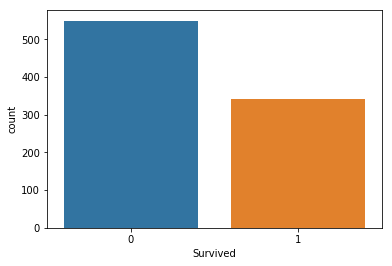

In [5]:
sns.countplot(x='Survived',data=data)

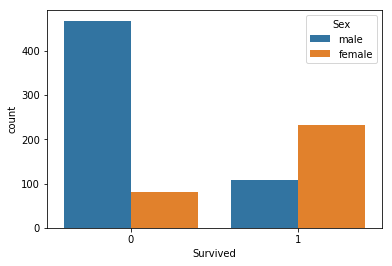

In [6]:
sns.countplot(x='Survived',hue='Sex',data=data)

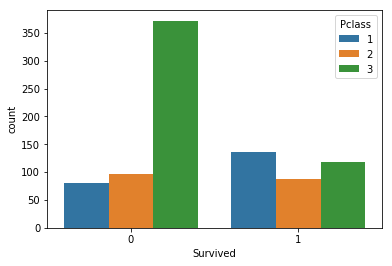

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=data)

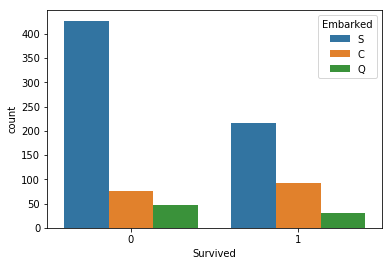

In [8]:
sns.countplot(x='Survived',hue='Embarked',data=data)

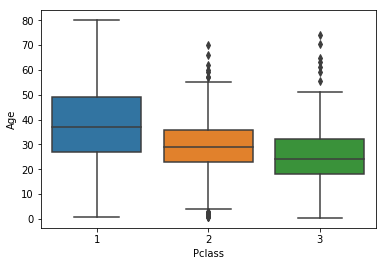

In [9]:
sns.boxplot(x='Pclass',y='Age', data=data)

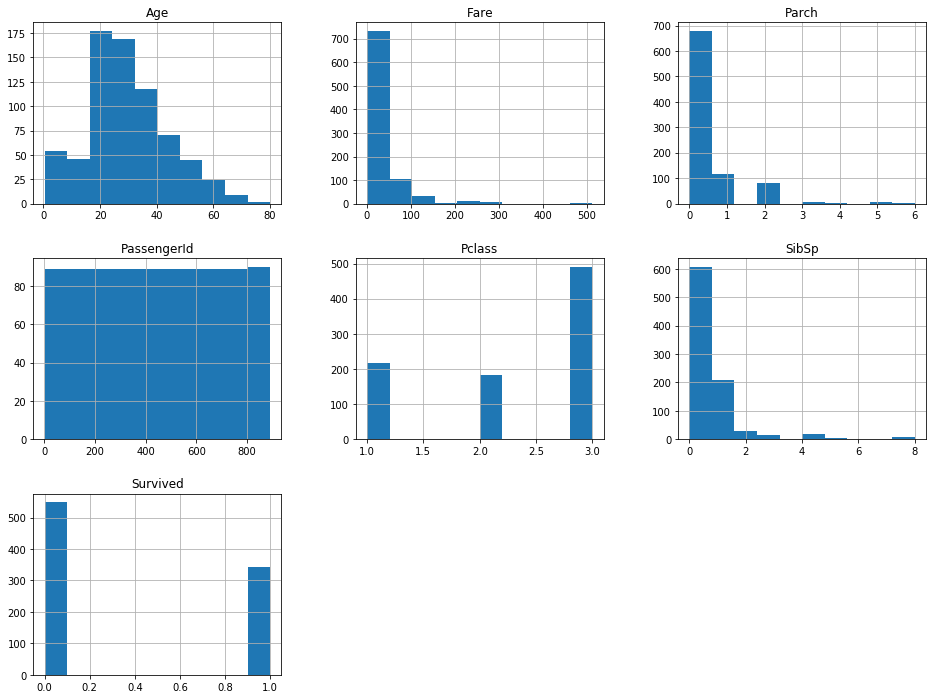

In [10]:
plt.rcParams['figure.figsize']=(16,12)
data.hist();

## Data Wrangling

In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data.drop('Cabin',axis=1,inplace=True)

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
not_zeros=['Age']
for column in not_zeros:
    data[column]=data[column].replace(0,np.NAN)
    mean=int(data[column].mean(skipna=True))
    data[column]=data[column].replace(np.NAN,mean)

In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
data.fillna('S',inplace=True)

In [17]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [19]:
pclass=pd.get_dummies(data['Pclass'],drop_first=True)

In [20]:
embarked=pd.get_dummies(data['Embarked'],drop_first=True)

In [21]:
data=pd.concat([data,sex,pclass,embarked],axis=1)

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [23]:
data.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [24]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train and Test

In [25]:
X=data.drop(['Survived'],axis=1)
y=data['Survived']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

## 1)logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression


In [29]:
model=LogisticRegression()

In [30]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
y_pred=model.predict(x_test)

In [32]:
model.score(x_test,y_test)

0.8097014925373134

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
print('accuracy_score:',accuracy_score(y_pred,y_test))

accuracy_score: 0.8097014925373134


In [35]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification_report:',classification_report(y_pred,y_test))
print('confusion_matrix:',confusion_matrix(y_pred,y_test))
print('accuracy_score:',accuracy_score(y_pred,y_test)*100)

classification_report:              precision    recall  f1-score   support

          0       0.88      0.83      0.85       181
          1       0.68      0.77      0.72        87

avg / total       0.82      0.81      0.81       268

confusion_matrix: [[150  31]
 [ 20  67]]
accuracy_score: 80.97014925373134


### 2) KNN

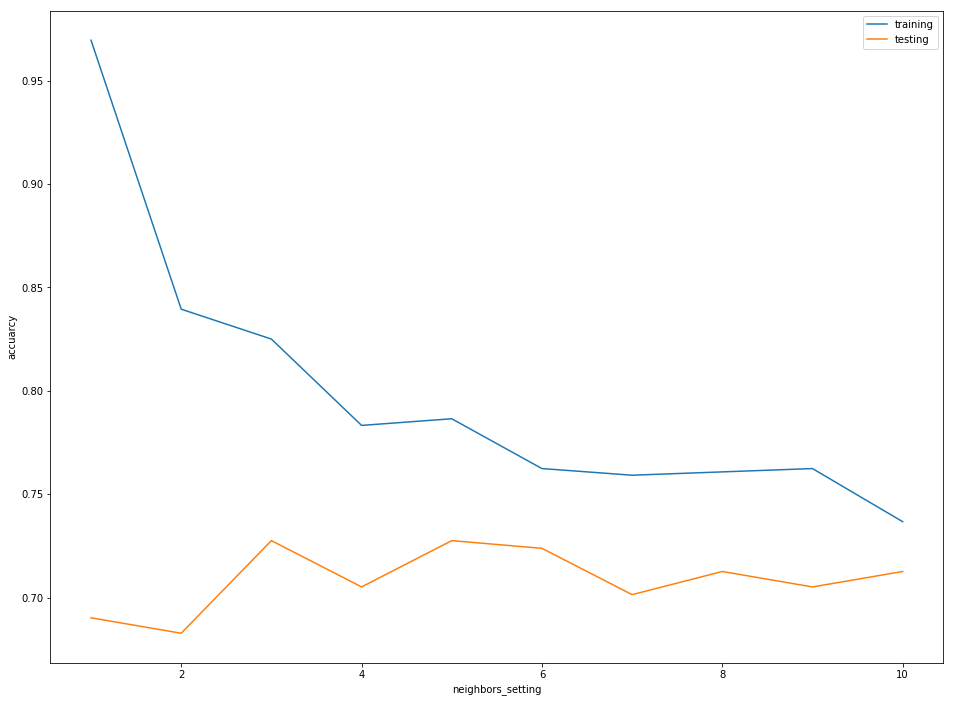

In [36]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
testing_accuracy=[]
neighbors_setting=range(1,11)
for n_neighbors in neighbors_setting:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    testing_accuracy.append(knn.score(x_test,y_test))
    
plt.plot(neighbors_setting,training_accuracy,label='training')
plt.plot(neighbors_setting,testing_accuracy,label='testing')
plt.xlabel('neighbors_setting')
plt.ylabel('accuarcy')
plt.legend()
plt.show()


In [37]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
print('training:{:}'.format(knn.score(x_train,y_train)))
print("testing:{:}".format(knn.score(x_test,y_test)))

training:0.7303370786516854
testing:0.7014925373134329


## 3) SVM

In [38]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.7798507462686567

In [39]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification_report:',classification_report(y_pred,y_test))
print('confusion_matrix:',confusion_matrix(y_pred,y_test))
print('accuracy_score:',accuracy_score(y_pred,y_test))

classification_report:              precision    recall  f1-score   support

          0       0.84      0.82      0.83       173
          1       0.68      0.71      0.69        95

avg / total       0.78      0.78      0.78       268

confusion_matrix: [[142  31]
 [ 28  67]]
accuracy_score: 0.7798507462686567


## 4) Naive Baye

In [40]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None)

In [41]:
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.7985074626865671

In [42]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification_report:',classification_report(y_pred,y_test))
print('confusion_matrix:',confusion_matrix(y_pred,y_test))
print('accuracy_score:',accuracy_score(y_pred,y_test))

classification_report:              precision    recall  f1-score   support

          0       0.85      0.84      0.84       172
          1       0.71      0.73      0.72        96

avg / total       0.80      0.80      0.80       268

confusion_matrix: [[144  28]
 [ 26  70]]
accuracy_score: 0.7985074626865671


## 5)RandomForest

In [43]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [44]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.8544776119402985

In [46]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification_report:',classification_report(y_pred,y_test))
print('confusion_matrix:',confusion_matrix(y_pred,y_test))
print('accuracy_score:',accuracy_score(y_pred,y_test)*100)

classification_report:              precision    recall  f1-score   support

          0       0.91      0.87      0.89       179
          1       0.76      0.83      0.79        89

avg / total       0.86      0.85      0.86       268

confusion_matrix: [[155  24]
 [ 15  74]]
accuracy_score: 85.44776119402985


### 1) logistic Regression-80.97%
###  2) KNN-70.14%
###  3) SVM-77.98%
###  4) Naive-bayes-79.85%
###  5) RandomForest-85.44%
    

#  According to above analyzies we have found RandoForest as the better output as 85.44%